## Passo 1 - Import de modulos

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from scipy.stats import norm

## Passo 2 - Carga dos dados

In [6]:
# Carregue aqui o dataset
entrada = pd.read_json("..\quanam.json", lines = True)
answers = pd.read_csv("..\ANSWERS.csv")


In [7]:
# Invertendo a ordem das colunas
cols = entrada.columns.tolist()
cols

['ILLUM', 'HUMID', 'CO2', 'SOUND', 'TEMP', 'RYTHM', 'ID']

In [8]:
cols = cols[-1:] + cols[:-1]
cols

['ID', 'ILLUM', 'HUMID', 'CO2', 'SOUND', 'TEMP', 'RYTHM']

In [9]:
entrada = entrada[cols]
entrada

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,1,467.90,65.59,486.10,41.06,23.27,92.39
1,2,387.14,70.23,501.81,25.93,18.77,85.17
2,3,339.75,74.72,535.88,30.50,19.41,80.76
3,4,390.19,63.83,422.76,24.18,17.41,63.55
4,5,454.11,70.64,619.85,16.50,20.31,83.19
...,...,...,...,...,...,...,...
3195,3196,549.06,67.97,553.70,27.40,16.49,76.93
3196,3197,408.51,63.25,516.07,28.51,20.22,84.96
3197,3198,459.01,56.65,453.37,25.81,19.04,83.65
3198,3199,545.56,68.65,487.74,26.41,21.87,84.38


In [12]:
# transforma json em csv
# entrada.to_csv('..\quanam.csv', index=False)

## Passo 3 - Analise e exploracao de Dados

In [10]:
dataset = entrada

In [11]:
print(dataset.shape)
print(dataset.info())
print(dataset.describe())
print(dataset.head())

(3200, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3200 non-null   int64  
 1   ILLUM   3200 non-null   float64
 2   HUMID   3200 non-null   float64
 3   CO2     3200 non-null   float64
 4   SOUND   3200 non-null   float64
 5   TEMP    3200 non-null   float64
 6   RYTHM   3200 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 175.1 KB
None
                ID        ILLUM        HUMID          CO2        SOUND  \
count  3200.000000  3200.000000  3200.000000  3200.000000  3200.000000   
mean   1600.500000   439.163412    67.086106   501.620666    29.840194   
std     923.904757    89.915142     4.776214    42.951183     6.158710   
min       1.000000   145.480000    51.860000   352.820000     8.060000   
25%     800.750000   377.060000    63.770000   471.427500    25.550000   
50%    1600.500000   437.375000    66.935000   502

In [12]:
dataset.isnull().sum()

ID       0
ILLUM    0
HUMID    0
CO2      0
SOUND    0
TEMP     0
RYTHM    0
dtype: int64

<AxesSubplot:>

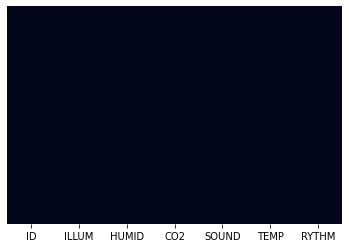

In [16]:
sns.heatmap(entrada.isnull(),yticklabels=False,cbar=False)

In [13]:
X = dataset.drop(['RYTHM'], axis=1)
y = dataset['RYTHM'].ravel()

In [ ]:
# Scatter Plot
area = np.pi*3
colors = (0,0,0)
plt.scatter(dataset.RYTHM, dataset.CO2, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(dataset.RYTHM, dataset.ID, label=f'ID Correlation = {np.round(np.corrcoef(dataset.RYTHM, dataset.ID)[0,1], 2)}')
plt.scatter(dataset.RYTHM, dataset.SOUND, label=f'SOUND Correlation = {np.round(np.corrcoef(dataset.RYTHM, dataset.SOUND)[0,1], 2)}')
plt.scatter(dataset.RYTHM, dataset.HUMID, label=f'HUMID Correlation = {np.round(np.corrcoef(dataset.RYTHM, dataset.HUMID)[0,1], 2)}')
plt.scatter(dataset.RYTHM, dataset.TEMP, label=f'TEMP Correlation = {np.round(np.corrcoef(dataset.RYTHM, dataset.TEMP)[0,1], 2)}')
plt.scatter(dataset.RYTHM, dataset.CO2, label=f'CO2 Correlation = {np.round(np.corrcoef(dataset.RYTHM, dataset.CO2)[0,1], 2)}')
plt.scatter(dataset.RYTHM, dataset.ILLUM, label=f'ILLUM Correlation = {np.round(np.corrcoef(dataset.RYTHM, dataset.ILLUM)[0,1], 2)}')

# Plot
plt.title('Scatterplot and Correlations')
plt.legend()
plt.show()

## Passo 4 - Pre processamento

In [38]:
X = dataset.drop(['RYTHM','ID'], axis=1)
y = dataset['RYTHM'].ravel()
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Passo 5 - Modelos de Regressão

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_test.shape

(960,)

In [29]:
# Lista as variaveis de coeficiente da equacao, ou seja a1xILLUM + a2xHUMID + a3xCO2 ... + b
print("Coefficientes:")
list(zip(X, lr.coef_))

Coefficientes:


[('ILLUM', 0.00953523530815628),
 ('HUMID', 0.032365881283270004),
 ('CO2', 0.050752830180973124),
 ('SOUND', 0.22518654102565758),
 ('TEMP', 1.117079031503732)]

In [30]:
# É o valor de b na formula acima
lr.intercept_

19.16428743712669

In [31]:
X_test1 = X_test[['ILLUM', 'HUMID', 'CO2', 'SOUND', 'TEMP']]
y_pred = lr.predict(X_test1)

In [32]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

,Actual value,Predicted value
0,76.27,78.050431
1,90.38,82.793538
2,82.25,78.472483
3,84.13,77.547214
4,72.76,78.848722


In [44]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(lr.score(X, y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 19.80
Mean Absolute Error: 4.841494479809561
Mean Square Error: 36.55023617562957
Root Mean Square Error: 6.045679132705405


In [39]:
import statsmodels.api as sm
modelo = sm.OLS(y, X)
res = modelo.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          1.108e+05
Date:                Thu, 25 Nov 2021   Prob (F-statistic):                        0.00
Time:                        17:16:37   Log-Likelihood:                         -10323.
No. Observations:                3200   AIC:                                  2.066e+04
Df Residuals:                    3195   BIC:                                  2.069e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
# Testando com normalização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalizado_X = scaler.fit_transform(X)
normalizado_X = pd.DataFrame(normalizado_X, columns=X.columns)
normalizado_X['intercept'] = 1

modelo_norm = sm.OLS(y, normalizado_X)
res = modelo_norm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     158.5
Date:                Thu, 25 Nov 2021   Prob (F-statistic):          7.44e-151
Time:                        17:24:42   Log-Likelihood:                -10299.
No. Observations:                3200   AIC:                         2.061e+04
Df Residuals:                    3194   BIC:                         2.065e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ILLUM          0.7950      0.110      7.255      0.0

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

### 5.0.5 - Feature selection

### Passo 5.1 — Criação e avaliação de modelos: linha base

### Passo 5.2 — Criação e avaliação de modelos: dados padronizados

### Passo 5.3 — Ajuste dos modelos

#### Passo 5.3.1 — Ajuste do KNN

#### Passo 5.3.2 — Ajuste do SVM

#### Passo 5.3.3 — Ajuste do RFC

#### Passo 5.3.4 — Ajuste do GBC

#### Passo 5.3.5 — Ajuste do LGBM

## Passo 6 — Finalização do Modelo